In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.integrate import dblquad
from scipy.special import hyp0f1, gamma

In [5]:
import matplotlib as mpl
def update_mpl_param(axeslabel, legend, xtick, ytick):
    pgf_with_latex = {                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots 
        "font.sans-serif": [],              # to inherit fonts from the document
        "font.monospace": [],
        "axes.labelsize": axeslabel,               # LaTeX default is 10pt font.
        "font.size": 14,
        "legend.fontsize": legend,               # Make the legend/label fonts 
        "xtick.labelsize": xtick,               # a little smaller
        "ytick.labelsize": ytick,    # default fig size of 0.9 textwidth
        "pgf.preamble": "\n".join([ # plots will use this preamble
            ])
        }
    mpl.rcParams.update(pgf_with_latex)

update_mpl_param(16,12,12,12)

## Get exact curve from ED

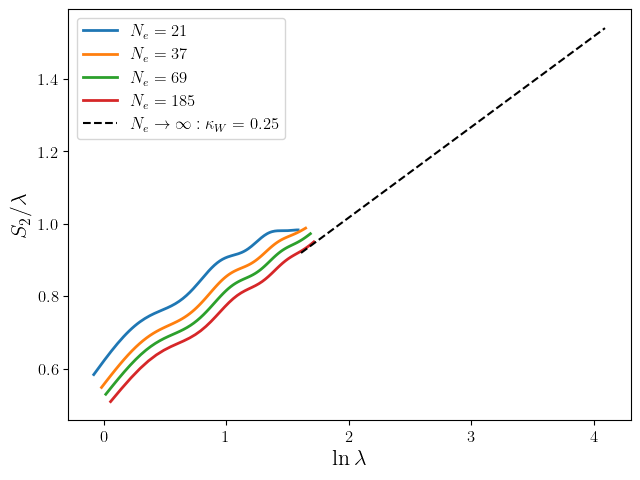

In [21]:
kFs = np.sqrt(np.array([5,10,20, 58]))#,117, 350]))

for kF in kFs:
    kx = ky = 0
    Kxs = [0]
    Kys = [0]
    for kx in range(1, int(np.floor(kF))+1):
        Kxs.append(kx)
        Kxs.append(-kx)
        Kys.append(0)
        Kys.append(0)

        Kxs.append(0)
        Kxs.append(0)
        Kys.append(kx)
        Kys.append(-kx)

    for kx in range(1,int(np.floor(kF))+1):
        for ky in range(1,int(np.floor(kF))+1):
            if kx**2 + ky**2 <= kF**2:
                Kxs.append(kx)
                Kys.append(ky)
                
                Kxs.append(kx)
                Kys.append(-ky)
                
                Kxs.append(-kx)
                Kys.append(ky)
                
                Kxs.append(-kx)
                Kys.append(-ky)

    Ne = len(Kxs)
    Ns = 2*Ne
    t = 1j

    Lx = np.sqrt(2*np.pi*Ns/np.imag(t))
    Ly = Lx*np.imag(t)

    M = np.zeros((Ne,Ne), dtype=np.complex128)
    regions = np.arange(0.3/np.sqrt(Ne),  1.6/np.sqrt(Ne), 0.002)
    S = np.zeros(regions.size)
    for k in range(regions.size):
        for i in range(Ne):
            M[i,i] = np.pi*regions[k]*regions[k]
            for j in range(i+1,Ne):
                #M[i,j] = np.sinc(regions[k]*(Kxs[i]-Kxs[j]))*np.sinc(regions[k]*(Kys[i]-Kys[j]))*regions[k]*regions[k]
                M[i,j] =  np.pi*regions[k]*regions[k]*hyp0f1(2, -((Kxs[i]-Kxs[j])**2 + (Kys[i]-Kys[j])**2)*(regions[k]*np.pi)**2)/gamma(2)
                M[j,i] = M[i,j]
        e = np.linalg.eigvalsh(M)
        S[k] = -np.sum(np.log(e**2 + (1-e)**2))

    x = regions*np.sqrt(2*np.pi/Ns)*kF*Lx
    #print(f"{Ne} electrons: 10% at {np.log(0.252*np.sqrt(2*np.pi/Ns)*kF*Lx)}")
    plt.plot(np.log(x), S/x, label=f"$N_e = {Ne}$", linewidth=2)
    #plt.scatter(np.log(0.218*np.sqrt(2*np.pi/Ns)*kF*Lx), S[17]/(0.218*np.sqrt(2*np.pi/Ns)*kF*Lx),marker='x')


x_fit = np.arange(5,60,0.1)
y_fit = 0.25*np.log(x_fit)+0.517
#y_fit = 0.25*np.log(x_fit)+0.59
#y_fit = 0.25*np.log(x_fit)+0.645
plt.plot(np.log(x_fit), y_fit, '--', c='k', label='$N_{e} \\to \\infty : \\kappa_{W} = 0.25$')

plt.legend()
#plt.title("$S_2$ - free fermions")
plt.xlabel("$\\ln \\lambda$")
plt.ylabel("$S_{2}/\\lambda$")

"""
update_mpl_param(12,12,10,10)
axin = inset_axes(ax, width="43%", height="45%", loc="upper left", bbox_to_anchor=(0.1,0,1,1), bbox_transform=ax.transAxes)
axin.scatter(Ls_inset[end_i:], g_00_mr, s=14, color='tab:blue', marker="o", facecolor="None", label="MR $0|0$")
axin.scatter(Ls_inset[end_i:], g_10_mr, s=14, color='tab:blue', marker="x", label="MR $1|0$")
axin.scatter(Ls_inset[end_i:], g_00_fredkin, s=14, color='tab:orange', marker="o", facecolor="None", label="Fredkin $0|0$")
axin.scatter(Ls_inset[end_i:], g_10_fredkin, s=14, color='tab:orange', marker="x", label="Fredkin $1|0$")
axin.hlines(y=[np.log(8)/2], xmin=Ls_inset[0], xmax=Ls_inset[-1], color='k', linestyles='--', linewidth=1)
axin.text(x=5.8, y=1.06, s="$\ln \sqrt{8}$")
axin.set_xlabel("\\boldmath$L_{\mathrm{max}}$")
axin.set_ylabel("\\boldmath$\gamma_{\mathrm{top}}$")
#axin.legend(loc='upper left')
update_mpl_param(16,16,14,14)
"""

plt.tight_layout(pad=0.5)
#plt.savefig('free fermions ED.pdf')#, dpi=400)

In [16]:
Lx

48.215957562371884

In [191]:
def InnerProductReal(y,x,n,m):
    return np.cos( (2*np.pi/Lx) * ((Kxs[n]-Kxs[m])*x + (Kys[n]-Kys[m])*y) ) / (Lx*Ly)
def InnerProductImag(y,x,n,m):
    return np.sin( (2*np.pi/Lx) * ((Kxs[n]-Kxs[m])*x + (Kys[n]-Kys[m])*y) ) / (Lx*Ly)

In [192]:
radii_unscaled = np.arange(0.1, 0.501, 0.02)
radii = radii_unscaled*Ly
state = "free_fermions"
S_int = np.zeros(radii.size)

for i in range(radii.size):
    print(f"Circle radius {radii[i]}")
    M = np.zeros((Ne, Ne), dtype=np.complex128)
    real_errors = np.zeros((Ne, Ne), dtype=np.float64)
    imag_errors = np.zeros((Ne, Ne), dtype=np.float64)

    for n in range(Ne):
        print(f"Calculating diagonal overlap of state {n}..")
        real, real_err = dblquad(InnerProductReal, -radii[i]/2, +radii[i]/2,
                                 -radii[i]/2, +radii[i]/2,
            args=(n, n))
        M[n, n] = real
        real_errors[n, n] = real_err

    for n in range(Ne):
        for m in range(n+1, Ne):
            print(f"Calculating overlap of states {n,m}..")
            real, real_err = dblquad(InnerProductReal, -radii[i]/2, +radii[i]/2,
                                 -radii[i]/2, +radii[i]/2,
                                     args=(n, m))
            imag, imag_err = dblquad(InnerProductImag, -radii[i]/2, +radii[i]/2,
                                 -radii[i]/2, +radii[i]/2,
                                     args=(n, m))
            M[n, m] = (real+1j*imag)
            real_errors[n, m] = real_err
            imag_errors[n, m] = imag_err

            
            M[m, n] = (real-1j*imag)
            real_errors[m, n] = real_err
            imag_errors[m, n] = imag_err

    
    e = np.linalg.eigvalsh(M)
    S_int[i] = -np.sum(np.log(e**2 + (1-e)**2))

Circle radius 1.6244807875181
Calculating diagonal overlap of state 0..
Calculating diagonal overlap of state 1..
Calculating diagonal overlap of state 2..
Calculating diagonal overlap of state 3..
Calculating diagonal overlap of state 4..
Calculating diagonal overlap of state 5..
Calculating diagonal overlap of state 6..
Calculating diagonal overlap of state 7..
Calculating diagonal overlap of state 8..
Calculating diagonal overlap of state 9..
Calculating diagonal overlap of state 10..
Calculating diagonal overlap of state 11..
Calculating diagonal overlap of state 12..
Calculating diagonal overlap of state 13..
Calculating diagonal overlap of state 14..
Calculating diagonal overlap of state 15..
Calculating diagonal overlap of state 16..
Calculating diagonal overlap of state 17..
Calculating diagonal overlap of state 18..
Calculating diagonal overlap of state 19..
Calculating diagonal overlap of state 20..
Calculating overlap of states (0, 1)..
Calculating overlap of states (0, 2)..

In [211]:
i = 3
n = 5
m = 4
print(radii_unscaled[3])
dblquad(InnerProductReal, -radii[i]/2, +radii[i]/2,
                                 -radii[i]/2, +radii[i]/2, args=(n, m))

0.16000000000000003


(0.020606605073876072, 2.2877927412374788e-16)

In [213]:
k = 3
print(regions[3])
np.sinc(regions[k]*(Kxs[n]-Kxs[m]))*np.sinc(regions[k]*(Kys[n]-Kys[m]))*regions[k]*regions[k]

0.16000000000000003


0.02060660507387608

In [177]:
M

0.3947998849730912

In [193]:
M = np.zeros((Ne,Ne), dtype=np.complex128)
regions = np.arange(0.1, 0.501, 0.02)
S = np.zeros(regions.size)
for k in range(regions.size):
    for i in range(Ne):
        M[i,i] = regions[k]*regions[k]
        for j in range(i+1,Ne):
            M[i,j] = np.sinc(regions[k]*(Kxs[i]-Kxs[j])*np.pi)*np.sinc(regions[k]*(Kys[i]-Kys[j])*np.pi)*regions[k]*regions[k]
            M[j,i] = M[i,j]

    e = np.linalg.eigvalsh(M)
    S[k] = -np.sum(np.log(e**2 + (1-e)**2))

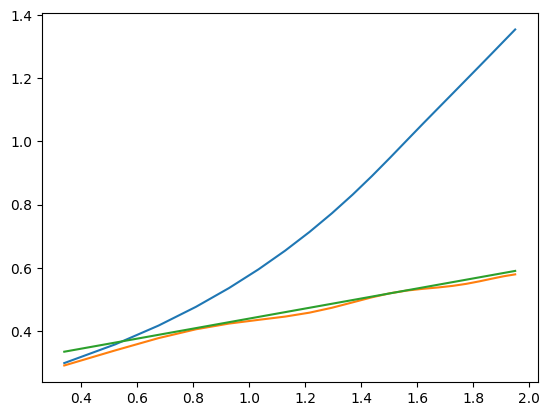

In [201]:
x = regions*np.sqrt(5*np.pi/Ne)*Lx
plt.plot(np.log(x), S/x)
plt.plot(np.log(x), S_int/x)

y_fit = 0.159*np.log(x)+0.28
plt.plot(np.log(x), y_fit)

In [5]:
for i in range(radii.size):
    print(f"Circle radius {radii[i]}")
    M = np.zeros((Ne, Ne), dtype=np.complex128)
    real_errors = np.zeros((Ne, Ne), dtype=np.float64)
    imag_errors = np.zeros((Ne, Ne), dtype=np.float64)

    for n in range(Ne):
        print(f"Calculating diagonal overlap of state {n}..")
        real, real_err = dblquad(InnerProductReal, Lx/2-radii[i], Lx/2+radii[i],
                                 lambda x: (
            Ly/2 - np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
            lambda x: (
            Ly/2 + np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
            args=(n, n))
        M[n, n] = real
        real_errors[n, n] = real_err

    for n in range(Ne):
        for m in range(n+1, Ne):
            print(f"Calculating overlap of states {n,m}..")
            real, real_err = dblquad(InnerProductReal, Lx/2-radii[i], Lx/2+radii[i],
                                     lambda x: (
                                     Ly/2 - np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
                                     lambda x: (
                                     Ly/2 + np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
                                     args=(n, m))
            imag, imag_err = dblquad(InnerProductImag, Lx/2-radii[i], Lx/2+radii[i],
                                     lambda x: (
                                     Ly/2 - np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
                                     lambda x: (
                                     Ly/2 + np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
                                     args=(n, m))
            M[n, m] = (real+1j*imag)
            real_errors[n, m] = real_err
            imag_errors[n, m] = imag_err

            
            M[m, n] = (real-1j*imag)
            real_errors[m, n] = real_err
            imag_errors[m, n] = imag_err

    np.save(f"{state}_overlaps_N_{Ne}_circle_{radii_unscaled[i]:.3f}.npy", M)
    np.save(
        f"{state}_overlaps_real_err_N_{Ne}_circle_{radii_unscaled[i]:.3f}.npy", real_errors)
    np.save(
        f"{state}_overlaps_imag_err_N_{Ne}_circle_{radii_unscaled[i]:.3f}.npy", imag_errors)

Circle radius 11.778485963082236
Calculating diagonal overlap of state 0..
Calculating diagonal overlap of state 1..
Calculating diagonal overlap of state 2..
Calculating diagonal overlap of state 3..
Calculating diagonal overlap of state 4..
Calculating diagonal overlap of state 5..
Calculating diagonal overlap of state 6..
Calculating diagonal overlap of state 7..
Calculating diagonal overlap of state 8..
Calculating diagonal overlap of state 9..
Calculating diagonal overlap of state 10..
Calculating diagonal overlap of state 11..
Calculating diagonal overlap of state 12..
Calculating diagonal overlap of state 13..
Calculating diagonal overlap of state 14..
Calculating diagonal overlap of state 15..
Calculating diagonal overlap of state 16..
Calculating diagonal overlap of state 17..
Calculating diagonal overlap of state 18..
Calculating diagonal overlap of state 19..
Calculating diagonal overlap of state 20..
Calculating diagonal overlap of state 21..
Calculating diagonal overlap of